[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Edge-Detection-/blob/master/CSE573_Edge_detection.ipynb)

Applying Horizontal Convolution for horizontal edge detection

In [15]:
#reading the image using cv2.imread


  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


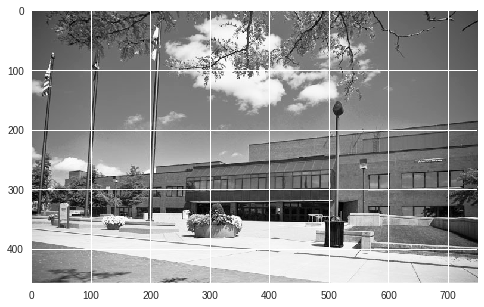

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#uploading file from local system

#from google.colab import files
#uploaded = files.upload()
#reading the image using cv2.imread


plt.imshow(input_image)





# Basic image transformation and processing function

In [0]:
def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
  return(input_image)


In [0]:
import numpy as np
#input_image=np.array([[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0]])
#plt.imshow(input_image)
input_image=np.array(input_image)
padded_input=np.pad(input_image,(1,1),'constant')
padded_input=np.array(padded_input)

horizontal_sobel_op=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
new_image=np.zeros((len(input_image),len(input_image[0])))
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
    new_image[x,y]=padded_input[x,y]*horizontal_sobel_op[0,0]+padded_input[x,y+1]*horizontal_sobel_op[0,1]+padded_input[x,y+2]*horizontal_sobel_op[0,2]+padded_input[x+1,y]*horizontal_sobel_op[1,0]+padded_input[x+1,y+1]*horizontal_sobel_op[1,1]+padded_input[x+1,y+2]*horizontal_sobel_op[1,2]+padded_input[x+2,y]*horizontal_sobel_op[2,0]+padded_input[x+2,y+1]*horizontal_sobel_op[2,1]+padded_input[x+2,y+2]*horizontal_sobel_op[2,2]



Flipping

In [0]:
def flipping(mat):

Padding

In [0]:
def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y*2,image_x+pad_x*2))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(pad_y,image_y+pad_y):
    for j in range(pad_x, image_x+pad_x):
      padded_image[i,j]=image[i-pad_y,j-pad_x]
  return(padded_image)

# Kernel based Functions.


Blurring with 1/9*I matrix

In [0]:
import numpy as np
#input_image=np.array([[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0]])
#plt.imshow(input_image)
input_image=np.array(input_image)
padded_input=np.pad(input_image,(1,1),'constant')
padded_input=np.array(padded_input)

#new_image2=np.zeros((len(input_image),len(input_image[0])))
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
      input_image[x,y]=255-input_image[x,y]
plt.imshow(input_image)      

kernel=np.array([[1/9,1/9,1/9,2/9],[1/9,1/9,1/9,2/9],[1/9,1/9,1/9,2/9]])
new_image=np.zeros((len(input_image),len(input_image[0])))
for input_x in range(len(input_image)):
  for input_y in range(len(input_image[0])):
     padded_input[input_x,input_y]=0
     for kernel_x in range(len(kernel)):
         for kernel_y in range(len(kernel[0])):
             padded_input[input_x,input_y]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x, input_y+kernel_y]*kernel[kernel_x,kernel_y]
plt.imshow(padded_input)                        

Dynamic Kernel edge detection

In [0]:
import numpy as np
#input_image=np.array([[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0]])
#plt.imshow(input_image)
kernel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
input_image=np.array(input_image)
padded_input=np.pad(input_image,(int((len(kernel)-1)/2),int((len(kernel)-1)/2)),'constant')
padded_input=np.array(padded_input)

'''
#new_image2=np.zeros((len(input_image),len(input_image[0])))
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
      input_image[x,y]=255-input_image[x,y]
plt.imshow(input_image)      
'''

new_image=np.zeros((len(input_image),len(input_image[0])))
for input_x in range(len(input_image)):
  for input_y in range(len(input_image[0])):
     new_image[input_x,input_y]=0
     for kernel_x in range(len(kernel)):
         for kernel_y in range(len(kernel[0])):
             new_image[input_x,input_y]=new_image[input_x,input_y]+padded_input[input_x+kernel_x, input_y+kernel_y]*kernel[kernel_x,kernel_y]
plt.imshow(new_image) 

Convolution function

In [0]:
def convolution(input_image, kernel):
  
  input_image=cv2.imread("task2.jpg",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
  input_image=negative(input_image)
  input_image=np.array(input_image)
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)

  new_image=np.zeros((len(input_image),len(input_image[0])))

  for input_x in range(len(input_image)):
    for input_y in range(len(input_image[0])):
        new_image[input_x,input_y]=0
        for kernel_x in range(len(kernel)):
           for kernel_y in range(len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
  new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
        if(new_image[x,y]>=50):
           new_image2[x,y]=0
        else:
           new_image2[x,y]=150
  return(new_image2)

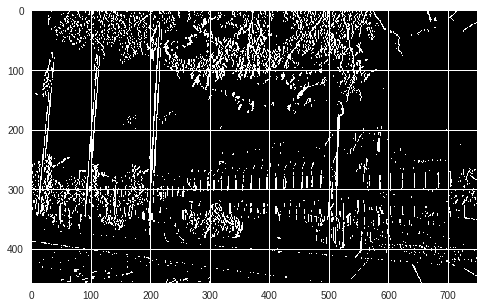

In [56]:
import numpy as np
horizontal_sobel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
vertical_sobel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
input_image=np.array(input_image)
plt.imshow(convolution(input_image,vertical_sobel)) 


# Preparing the final output


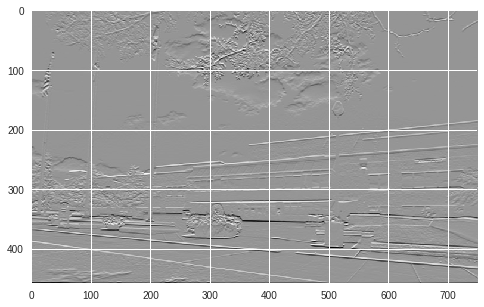

In [47]:
plt.imshow(new_image)

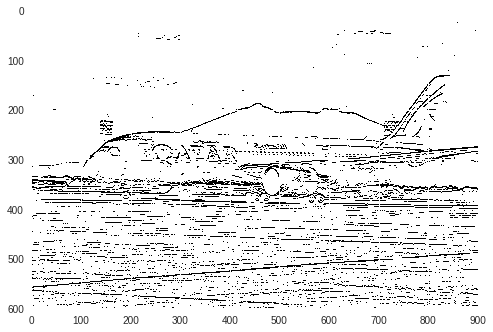

In [20]:
new_image2=np.zeros((len(input_image),len(input_image[0])))
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
      if(new_image[x,y]>=50):
        new_image2[x,y]=1000
      else:
        new_image2[x,y]=-1000
      
    
    
plt.imshow(new_image2)
#print(new_image)

In [9]:
np.min(new_image)

NameError: ignored

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 3],
       [0, 0, 0, 2, 6, 6],
       [0, 0, 0, 7, 7, 7]])